# Ridge regression on a simple 2D example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generate the points

In [116]:
mean = np.array([0,0])
P = np.array([[1, 1], [-1, 1]]) # matrice de changement de base, pour pencher ma distribution
cov = np.dot(np.dot(P, np.array([[0.1,0],[0,1]])), np.linalg.inv(P))
print cov

[[ 0.55  0.45]
 [ 0.45  0.55]]


In [117]:
x, y = np.random.multivariate_normal(mean, cov, 100).T

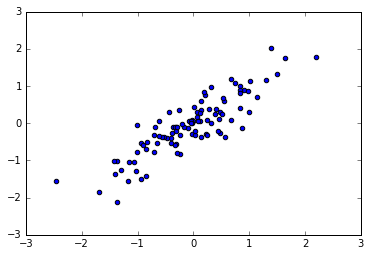

In [118]:
plt.axis([-3,3,-3,3])
plt.scatter(x, y)

In [124]:
one = np.ones(len(x)).reshape(len(x), 1) # for the bias

X, y = np.concatenate([one, x.reshape(len(x), 1)], axis=1) , y.reshape(len(y), 1)

## Compute the model

We want to estimate $y_i$ with $f(x_i) = w \cdot x_i$ . Here, w is 2D column vector (the slope and the bias), x is a 2D row vector (the first column is 1, for the bias).

We seek to minimize $R(w) =  \sum_i{(w \cdot x_i - y_i)^2} = ||X w - Y||^2$.

Since then, $\nabla_w R(w) = X^T X w - X^T Y = 0$ ($X^T X$ est une matrice carrée de dimension 2). 

If $ X^T X$ is invertible, we directly have $w$. Otherwise, we can replace it by $ X^T X + \lambda I$ with $\lambda$ near 0 ($\lambda$ is the regularisation term, also known as ridge)

In [125]:
S = np.dot(X.transpose(), X)
lamda = 0.9
print S

[[ 100.           19.02032048]
 [  19.02032048   55.82808969]]


In [126]:
w = np.dot(np.dot(np.linalg.inv(S + lamda * np.eye(len(S))), X.transpose()), y)
print w

[[-0.00456616]
 [ 0.76935654]]


## Display the result

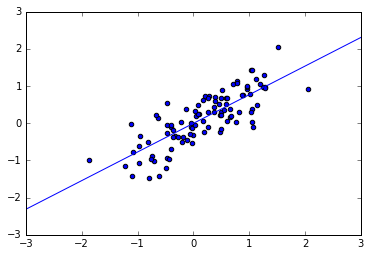

In [127]:
new_x = np.linspace(-5, 5, 101)
y_predict = w[1] * new_x + w[0]

plt.axis([-3,3,-3,3])
plt.scatter(x, y)
plt.plot(new_x, y_predict)